In [1]:
# personally made imports
import acquire_p

# typical imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# modeling methods
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

#clean look
import warnings
warnings.filterwarnings("ignore")

get_bilancino_data()
prepare(df)


In [2]:
lake = acquire_p.get_bilancino_data()

In [3]:
lake = acquire_p.prepare(lake)

In [4]:
cat_col = lake.columns

In [5]:
cat_col

Index(['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
       'Lake_Level', 'Flow_Rate'],
      dtype='object')

In [6]:
def visual(df):
    plt.figure(figsize=(16, 16))
    for i, col in enumerate(cat_col):
        plot_number = i + 1
        l= len(cat_col)
        plt.subplot(9,1,plot_number)
        sns.lineplot(x = df.index, y = df[col])
        plt.suptitle('---------------------20XX-------------------')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

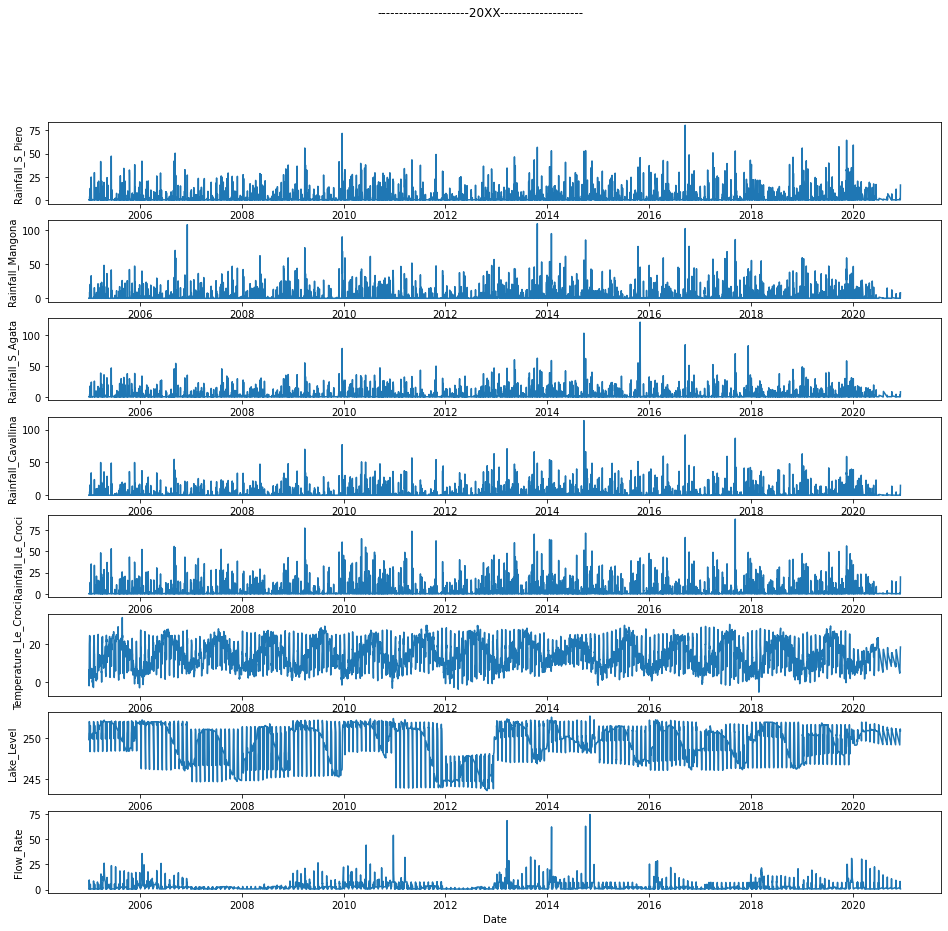

In [7]:
visual(lake)

# Takeaway
I think the patterns are a little lost in the noise. I am going to try resampling on a monthly basis

# Monthly

In [8]:
lake_m = lake.resample('M').mean()

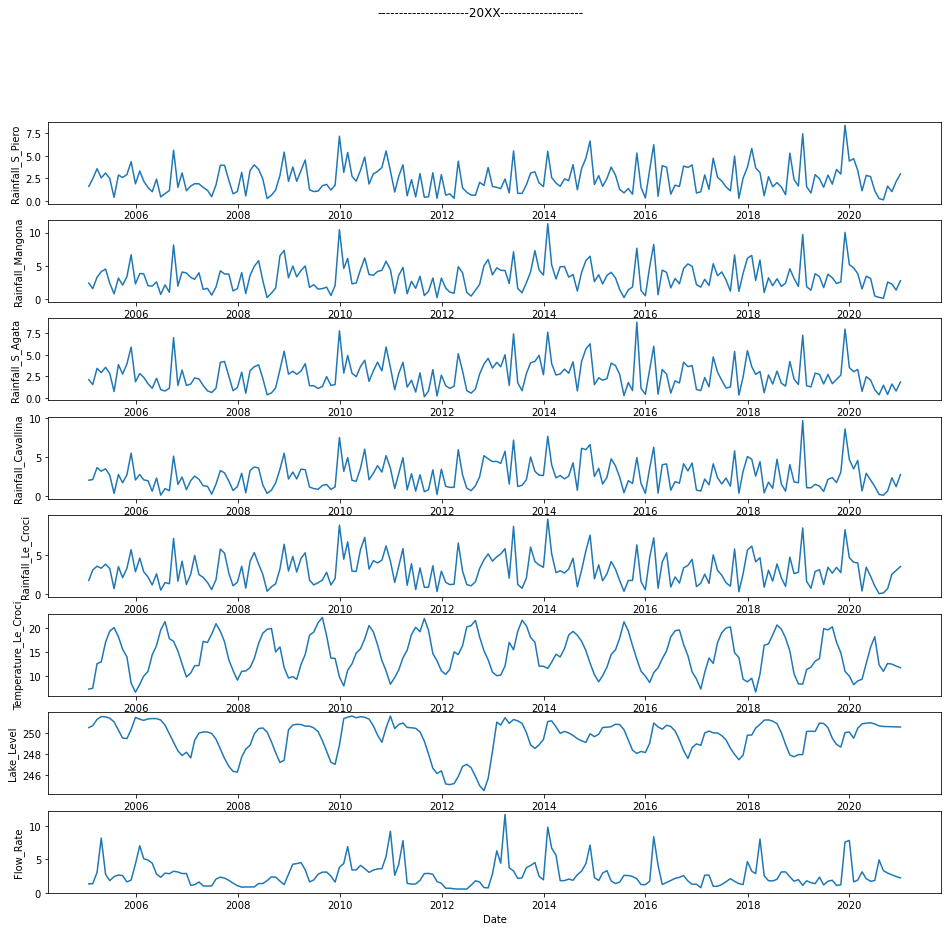

In [9]:
visual(lake_m)

<AxesSubplot:ylabel='Date'>

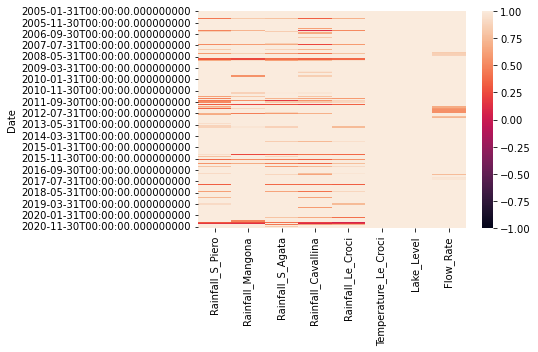

In [10]:
sns.heatmap(lake_m, vmin = -1, vmax = 1)

In [11]:
# difficult to see the variations, I will try 3M boxes

In [12]:
lake_3m = lake.resample('3M').mean()

<AxesSubplot:ylabel='Date'>

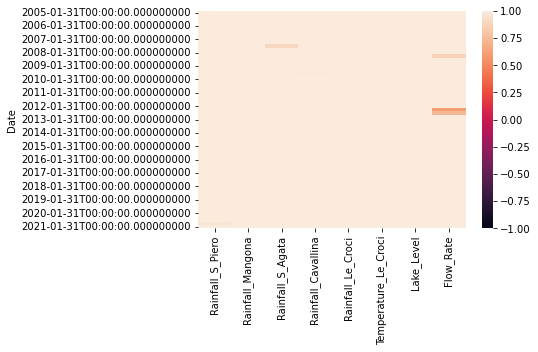

In [13]:
sns.heatmap(lake_3m, vmin = -1, vmax = 1)

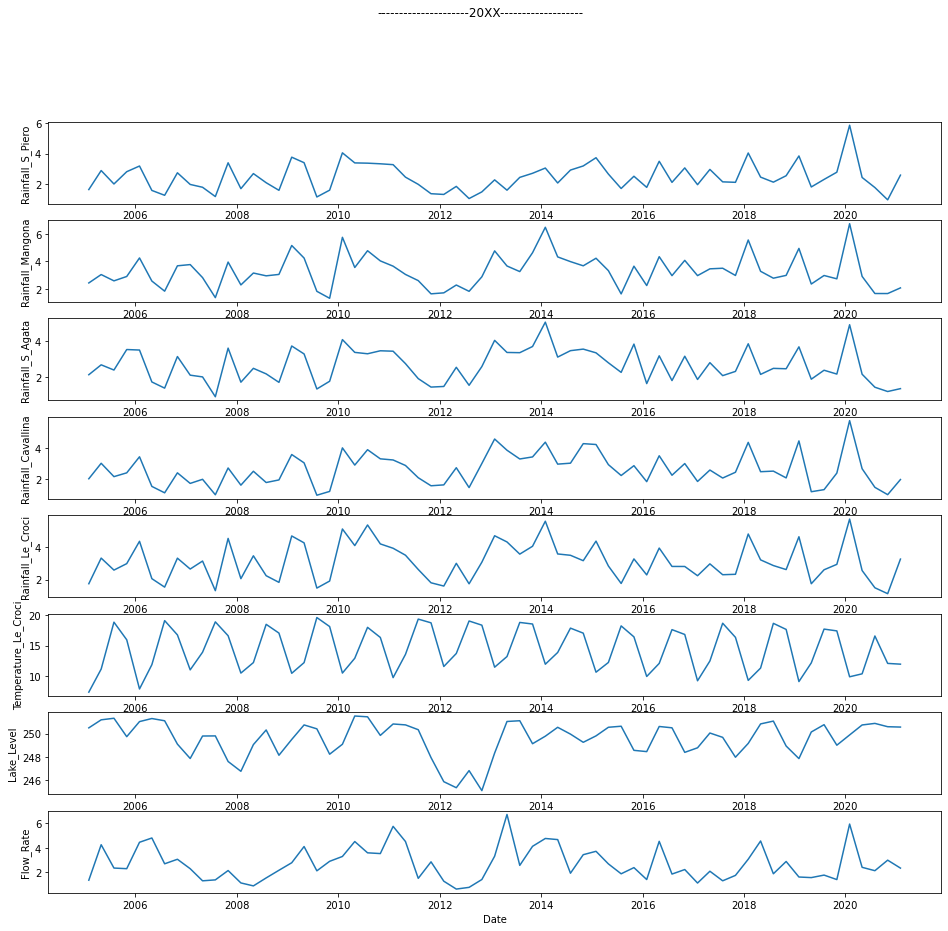

In [14]:
visual(lake_3m)

# Takeaway
# 3m smoothes the data out too much in my opinion

# Look at the data on a year by year basis

In [15]:
l = ['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']

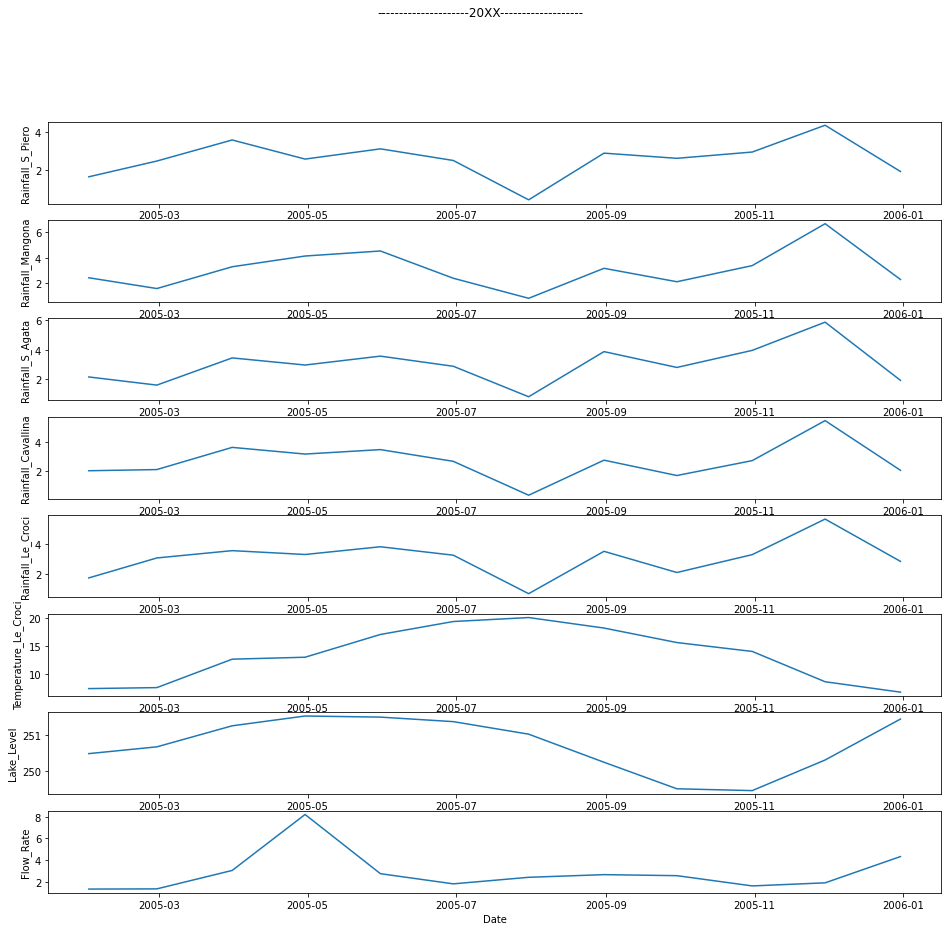

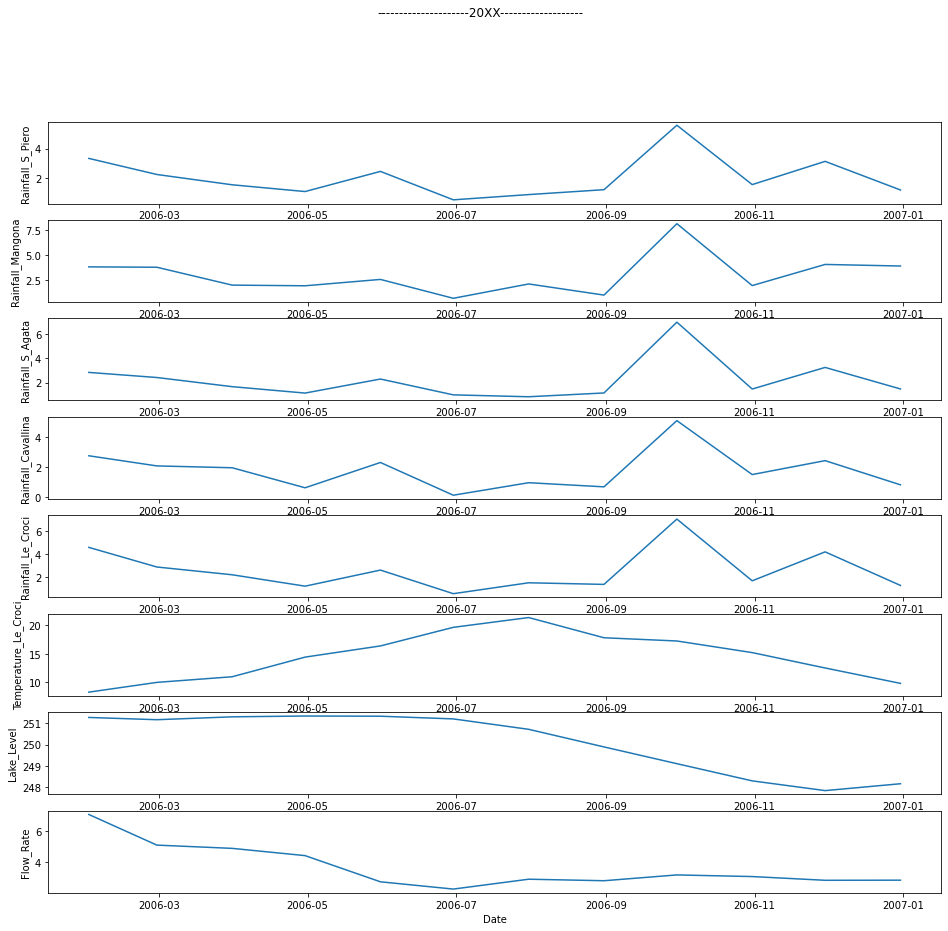

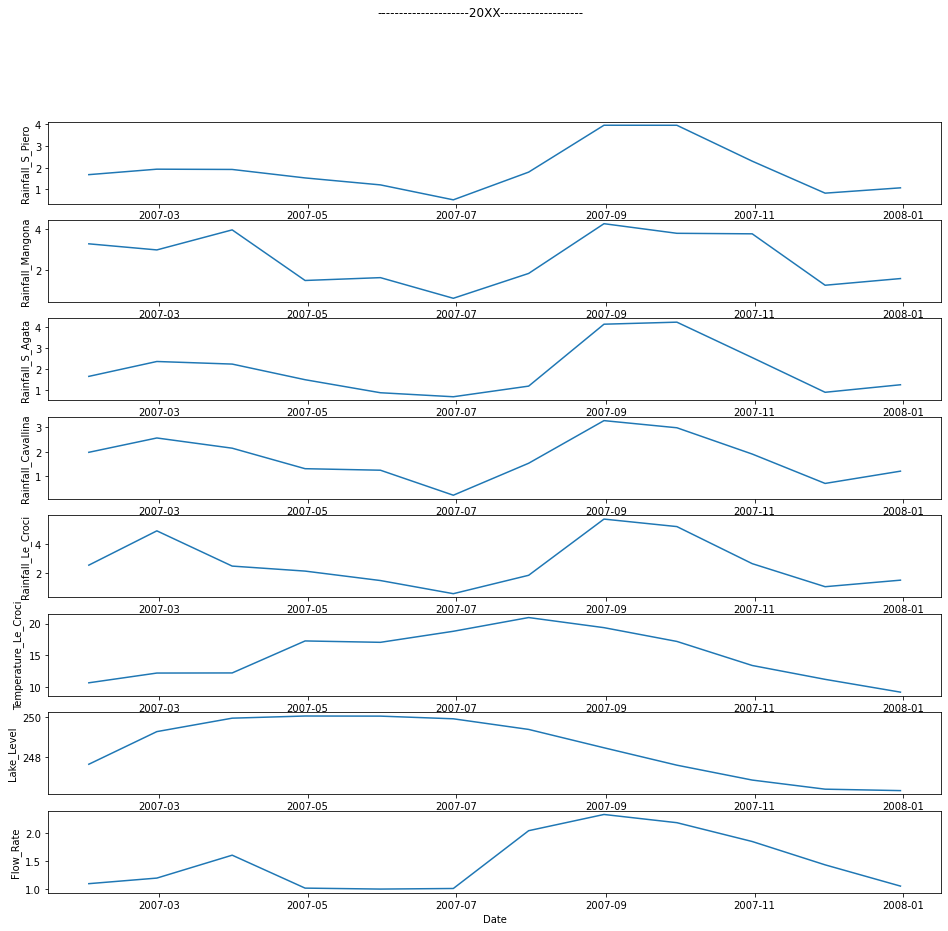

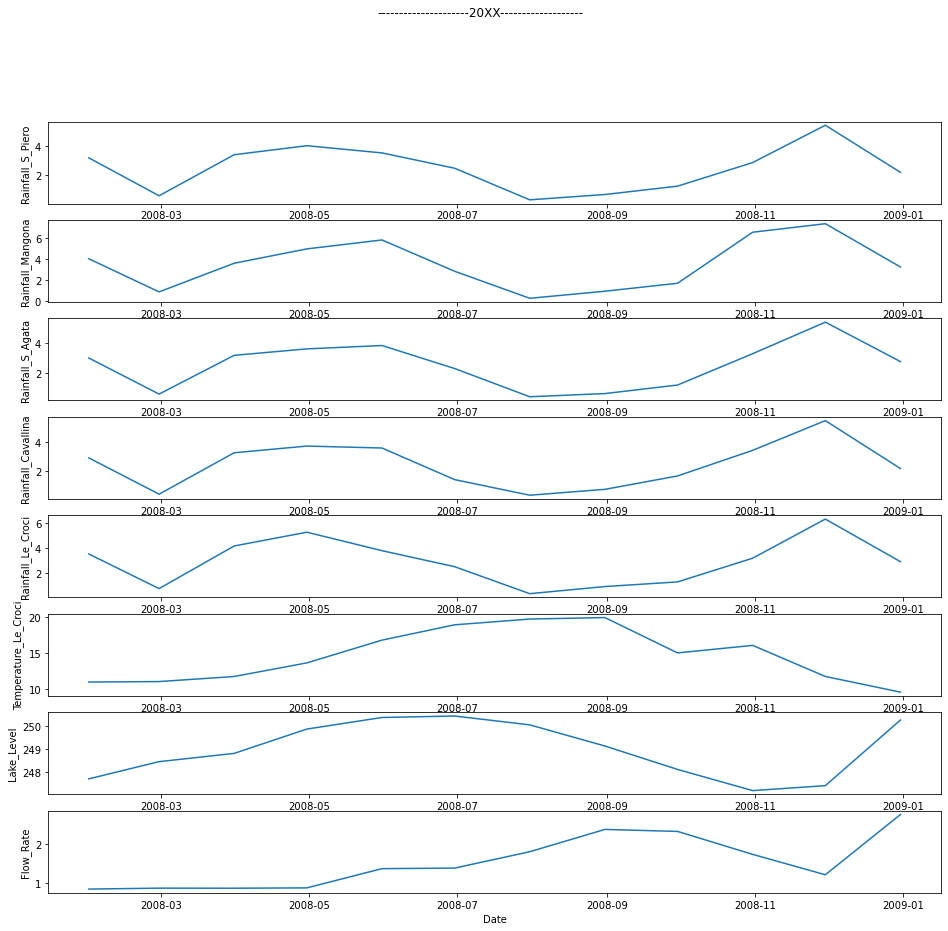

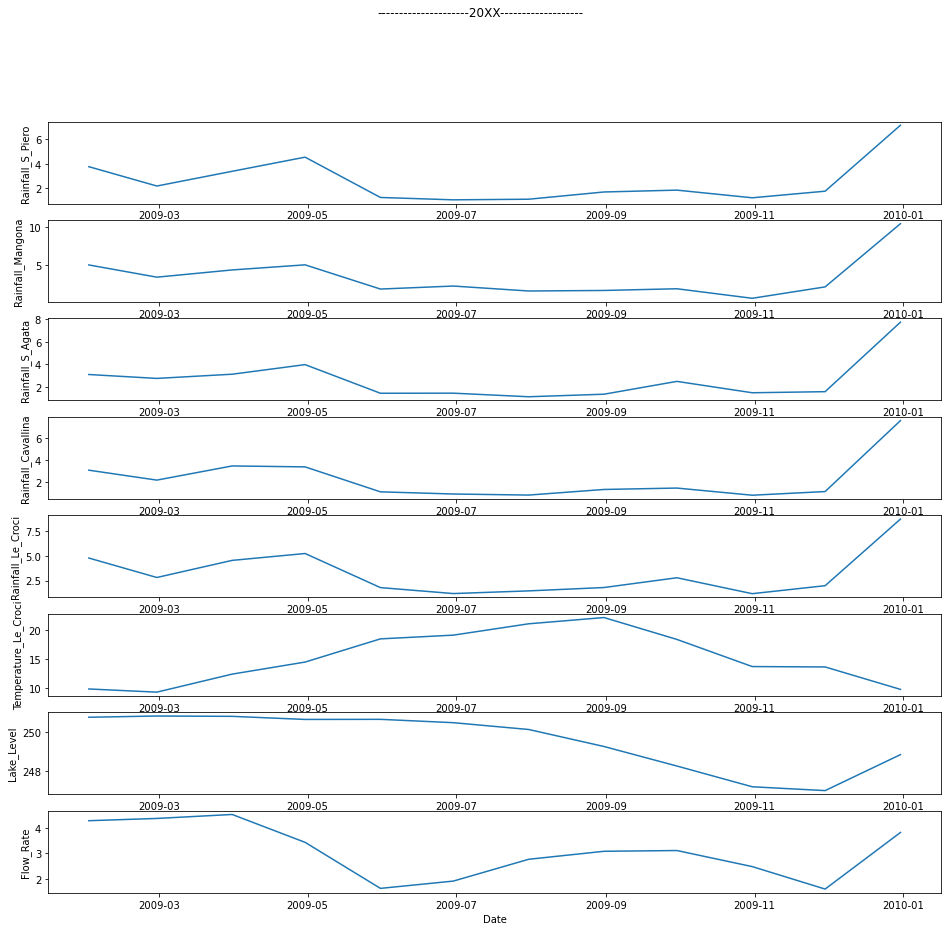

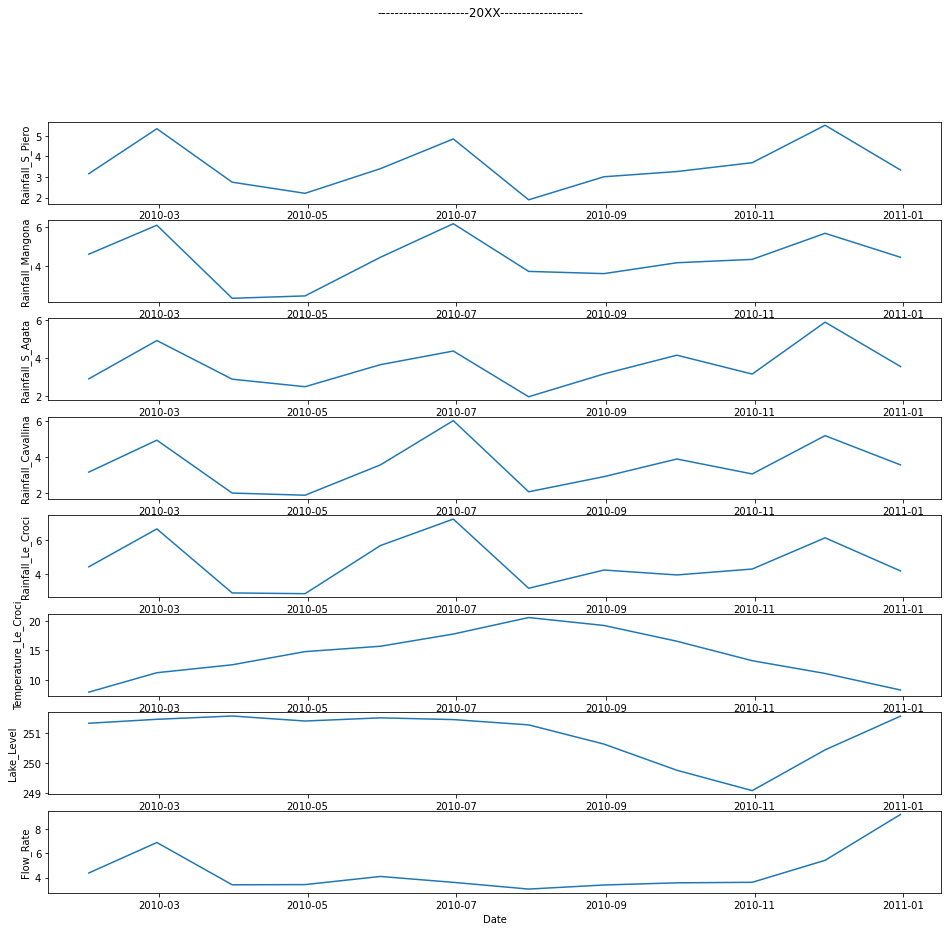

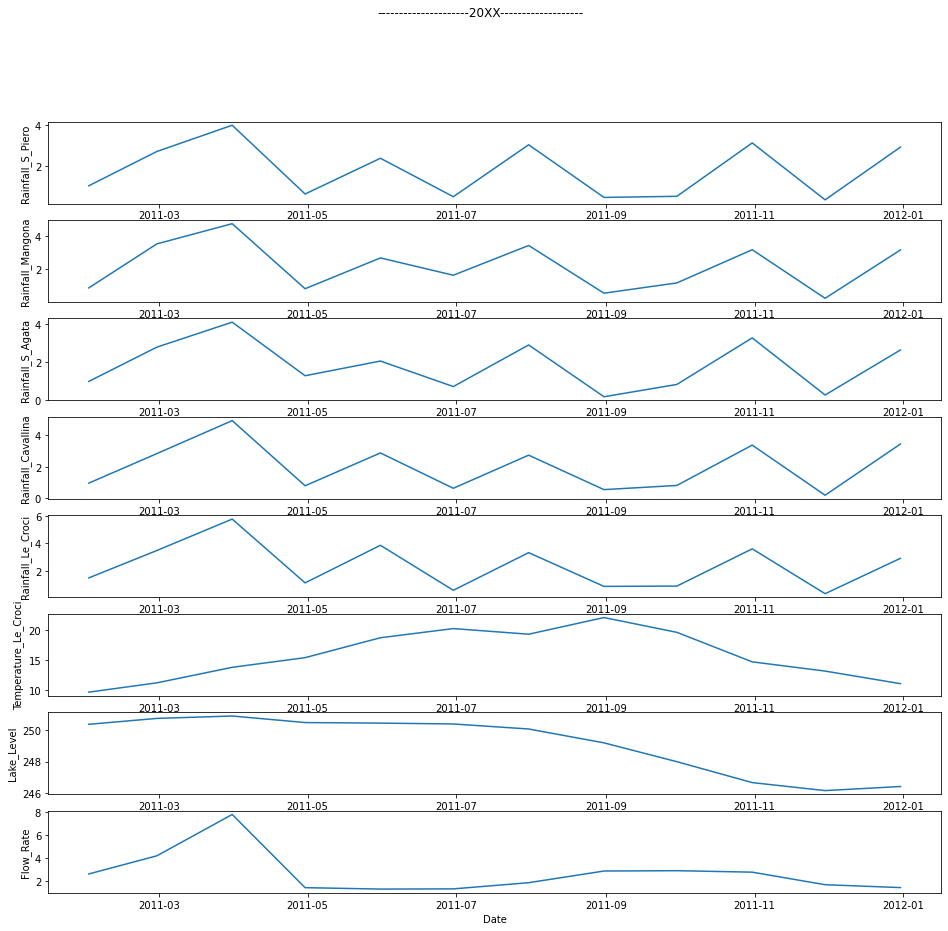

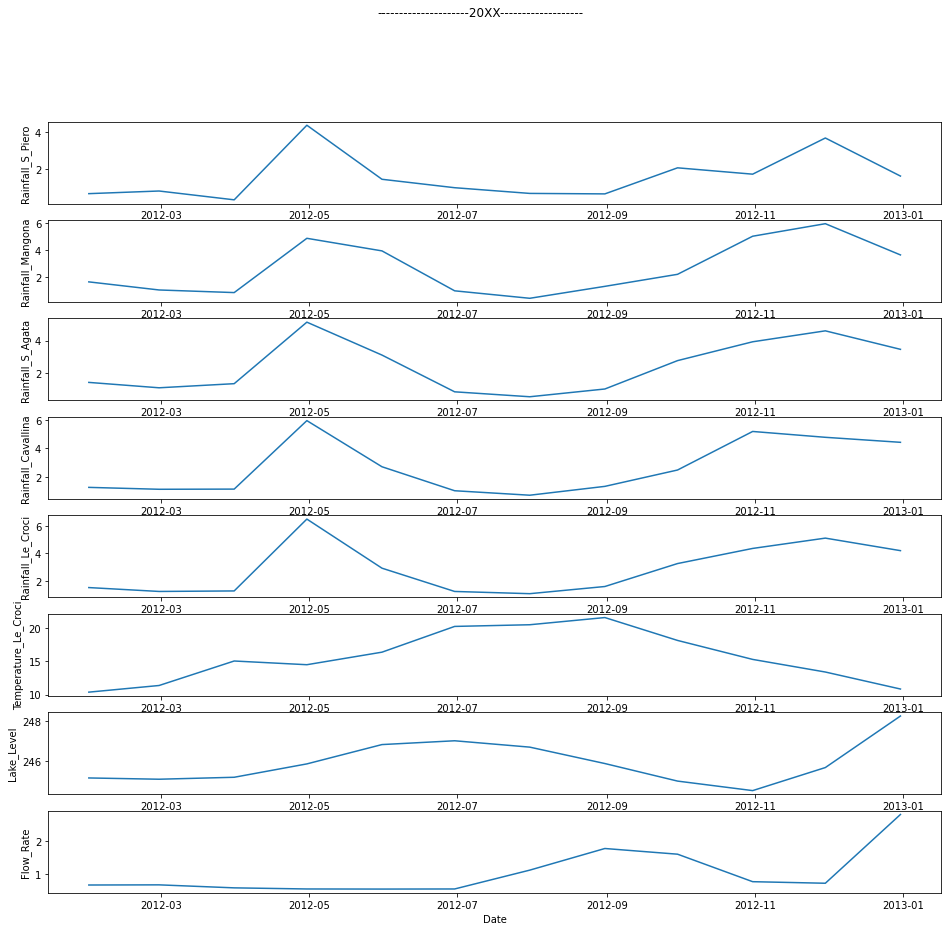

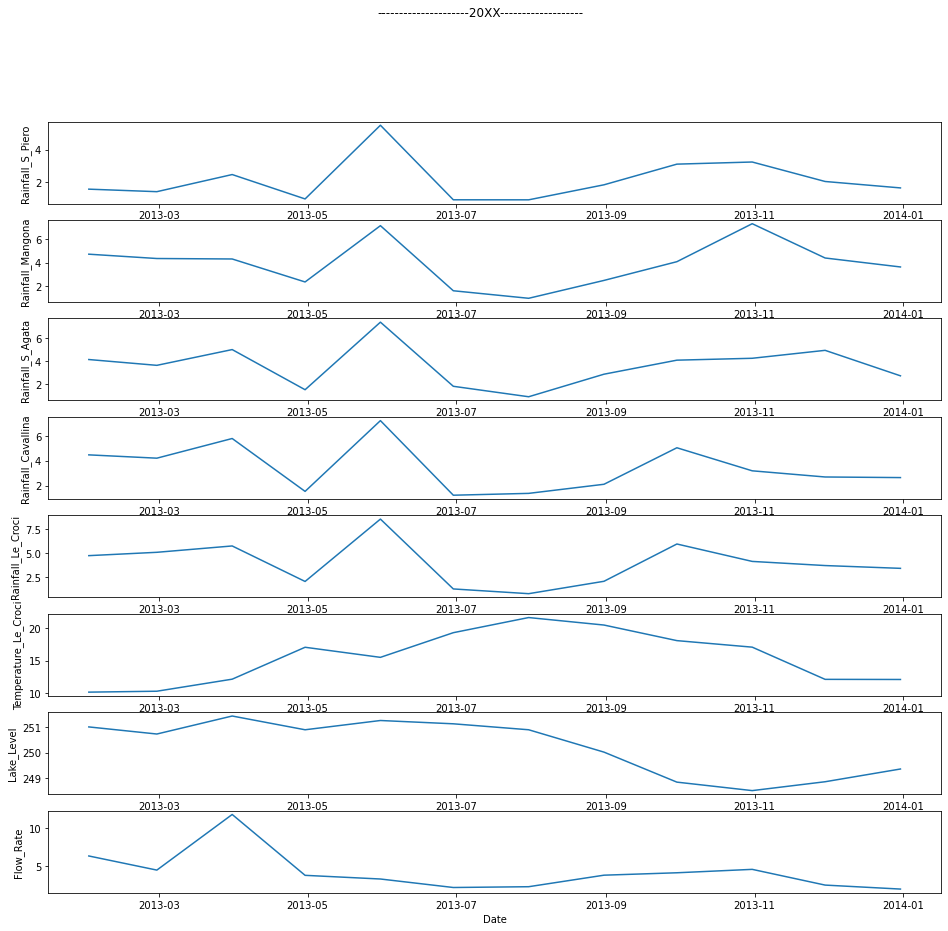

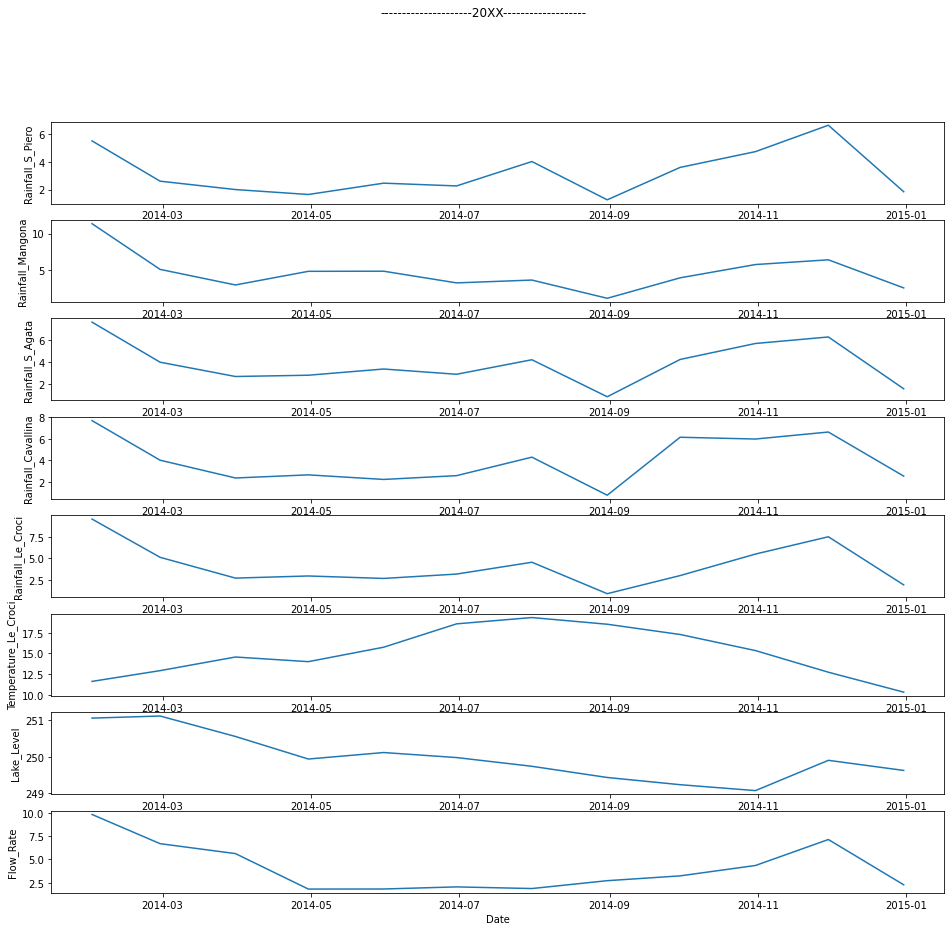

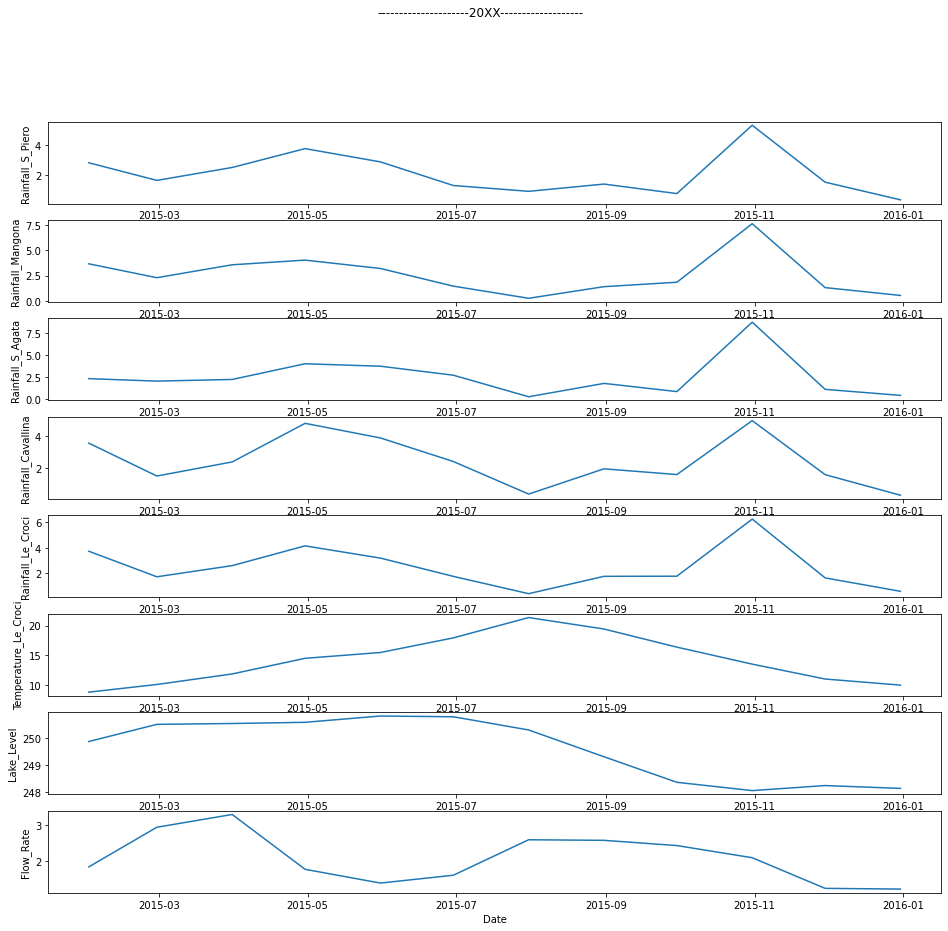

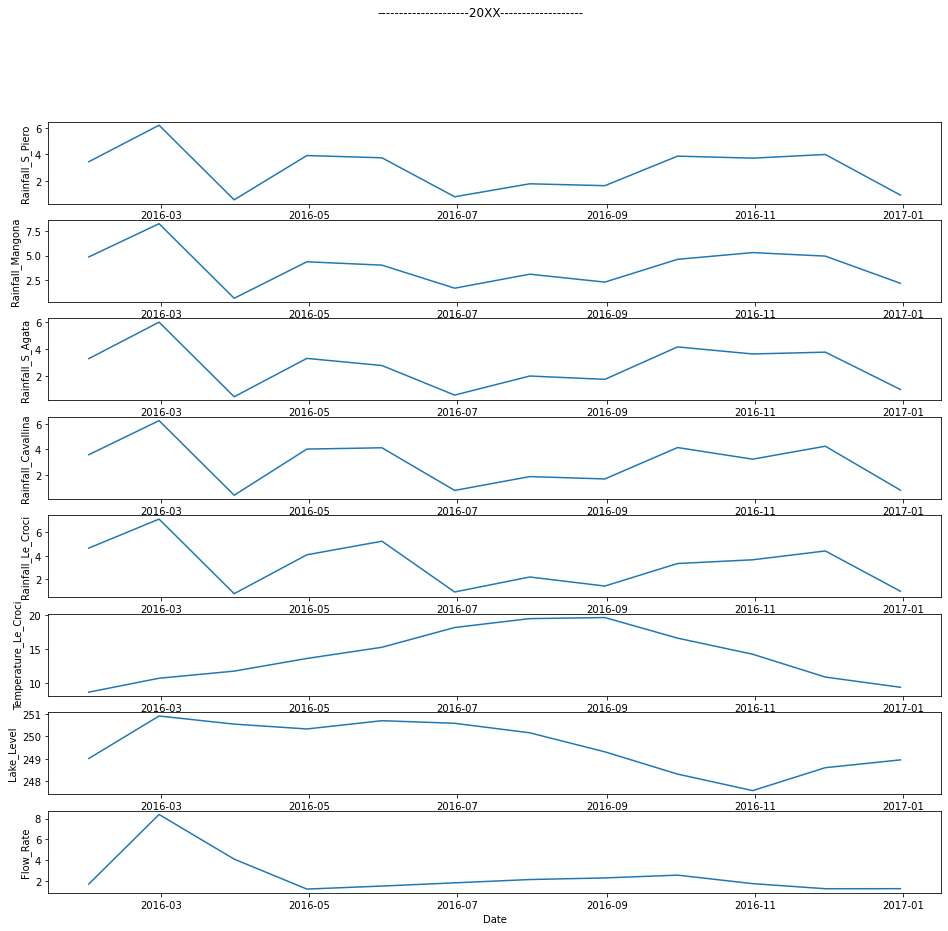

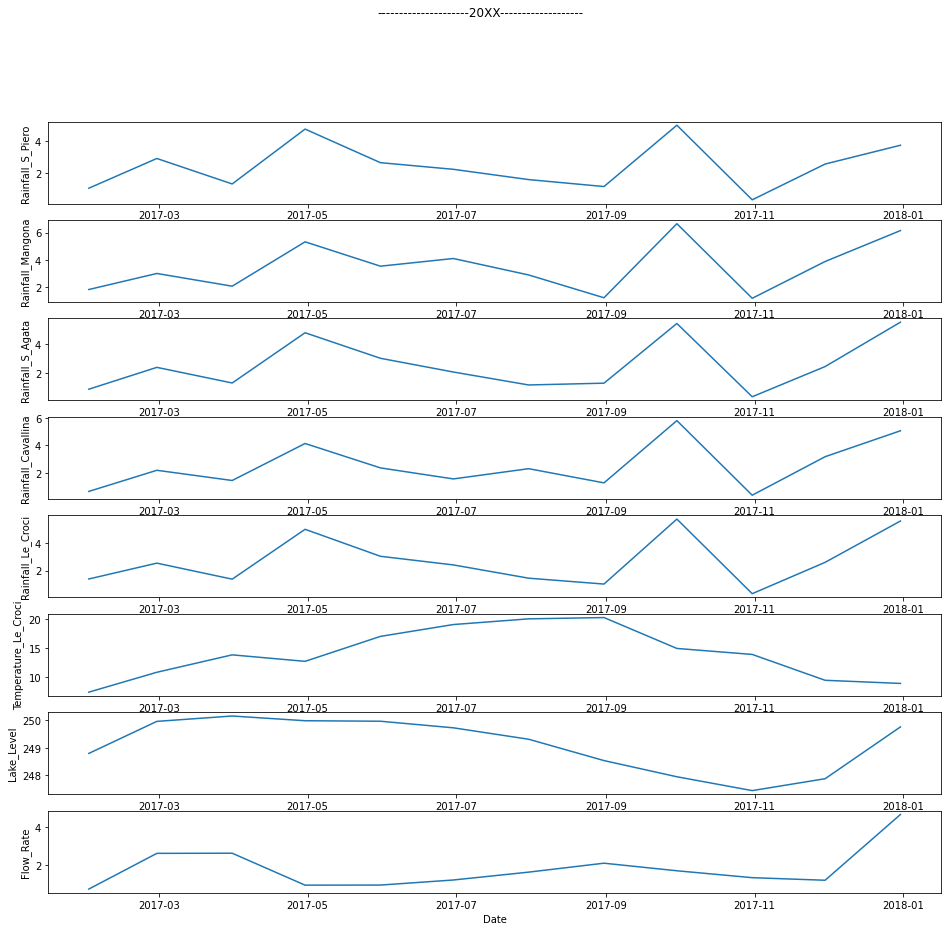

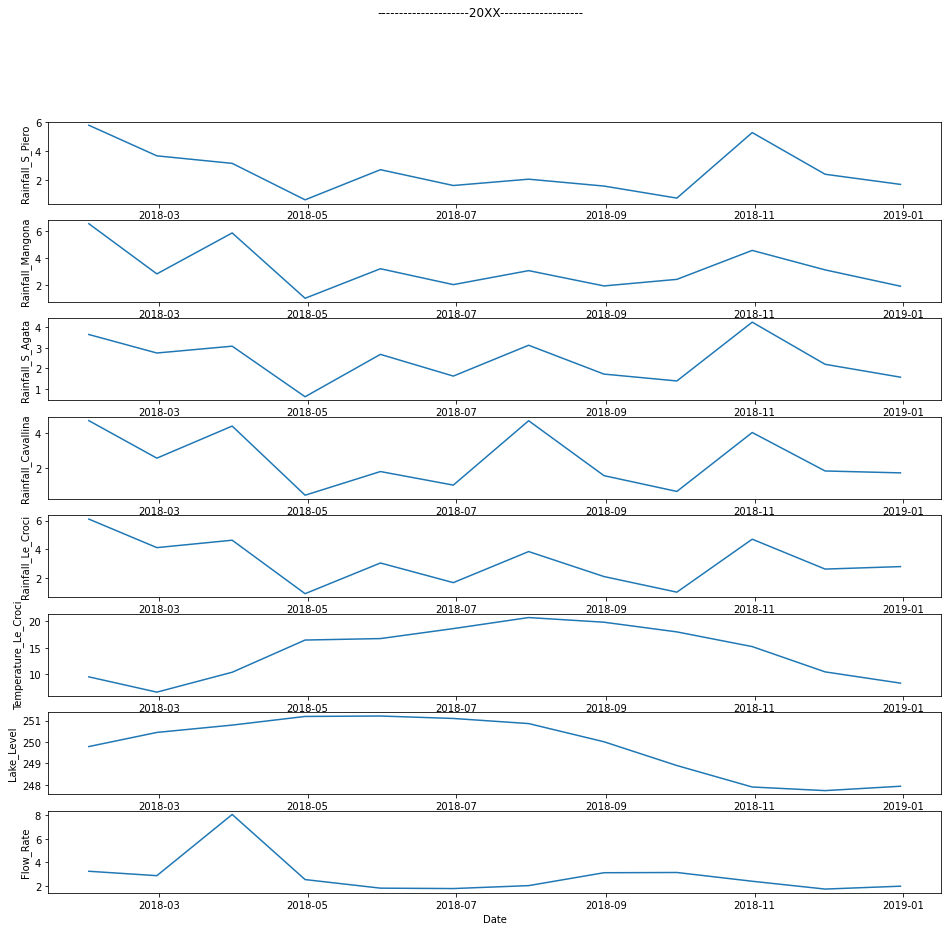

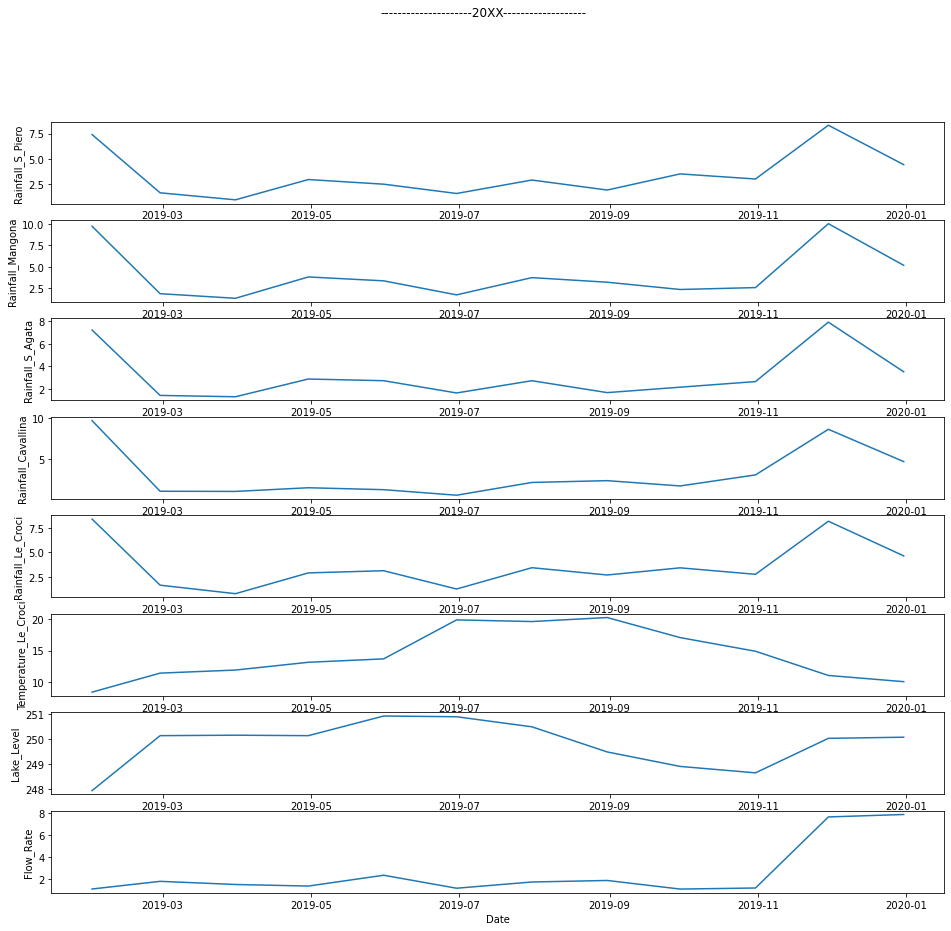

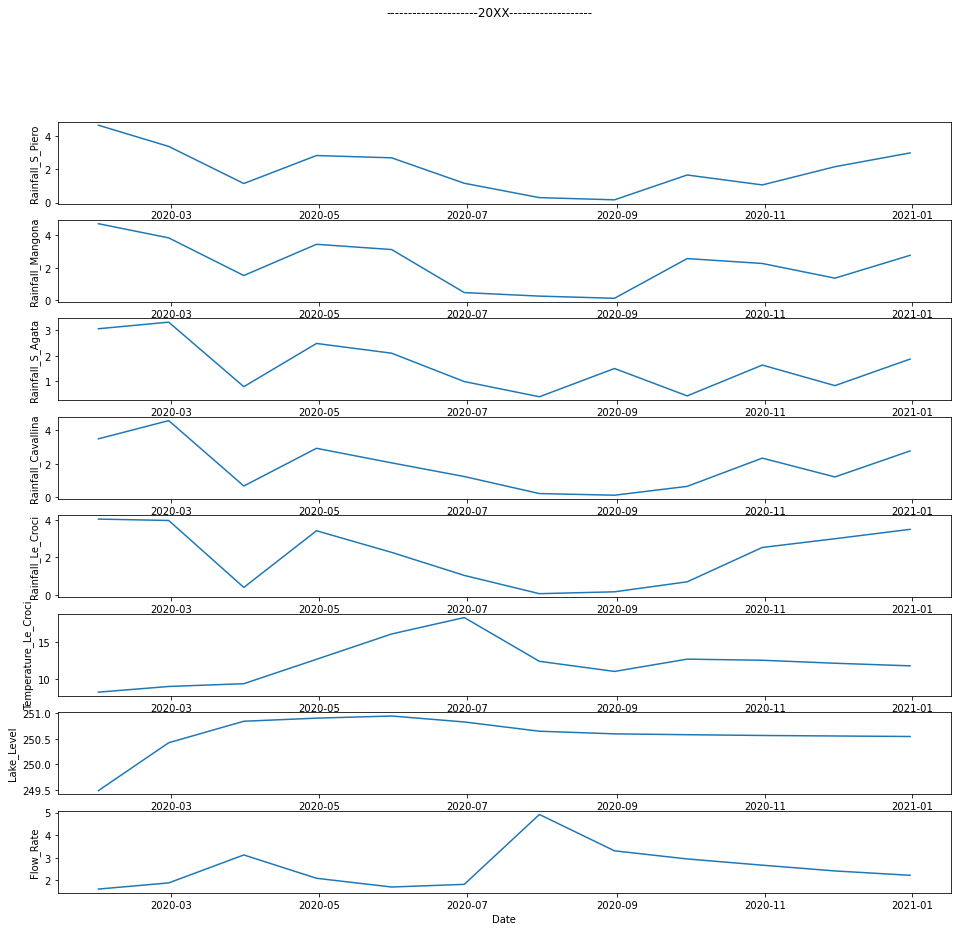

In [16]:
for i in l:
    n = '20'+ i
    m = lake[(lake.index >= n+'-01-01') & (lake.index <= n+'-12-31')]
    o = m.resample('M').mean()
    visual(o)
    

# Takeaway

Shift: \
2005-3M \
2006-4M-T \
2008 - 3M rain, 3MT \
2015-2020 also 3M
### I'm going to shift the graphs 3-months since it appears there is a delay time of 3 months from the rain and temperature effect on lake level


In [17]:
lake.columns

Index(['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
       'Lake_Level', 'Flow_Rate'],
      dtype='object')

# Stats Testing

# I have all continuous variables so I will use Spearman or Pearson
# Spearman is better with monotonic data so I choose that one

In [18]:
cat_col = lake.columns

In [19]:
stat_norm = []

In [20]:
for col in cat_col:
    print(col)
    print(stats.spearmanr(lake.Lake_Level, lake[col]))
    stat_norm.append(stats.spearmanr(lake.Lake_Level, lake[col]))

Rainfall_S_Piero
SpearmanrResult(correlation=-0.0202731031820558, pvalue=0.12725270310762363)
Rainfall_Mangona
SpearmanrResult(correlation=0.03272778705061098, pvalue=0.01380397456019598)
Rainfall_S_Agata
SpearmanrResult(correlation=0.012918040883941438, pvalue=0.33120554647019973)
Rainfall_Cavallina
SpearmanrResult(correlation=0.013189599078239522, pvalue=0.3211405938008406)
Rainfall_Le_Croci
SpearmanrResult(correlation=0.008057910057613043, pvalue=0.5444507014107909)
Temperature_Le_Croci
SpearmanrResult(correlation=0.034402559821438215, pvalue=0.009642257913187863)
Lake_Level
SpearmanrResult(correlation=1.0, pvalue=0.0)
Flow_Rate
SpearmanrResult(correlation=0.2698533780412611, pvalue=5.005886458834358e-95)


In [21]:
stat_norm = pd.DataFrame(stat_norm, index = cat_col).round(4)

In [22]:
stat_norm

,correlation,pvalue
Rainfall_S_Piero,-0.0203,0.1273
Rainfall_Mangona,0.0327,0.0138
Rainfall_S_Agata,0.0129,0.3312
Rainfall_Cavallina,0.0132,0.3211
Rainfall_Le_Croci,0.0081,0.5445
Temperature_Le_Croci,0.0344,0.0096
Lake_Level,1.0000,0.0000
Flow_Rate,0.2699,0.0000


# 3 Month Shift
3 months is appoximately 90 days

In [23]:
lake_s = acquire_p.get_bilancino_data()

In [24]:
lake_s = acquire_p.prepare(lake_s)

In [25]:
lake_s[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci']] = lake_s[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci']].shift(periods = 90, fill_value=0)

In [26]:
lake_s.resample('M').sum()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2005-01-31,0.0,0.0,0.0,0.0,0.0,0.00,7764.91,41.20
2005-02-28,0.0,0.0,0.0,0.0,0.0,0.00,7018.77,37.70
2005-03-31,0.0,0.0,0.0,0.0,0.0,0.00,7789.03,94.40
2005-04-30,50.8,75.2,66.0,63.0,54.0,225.10,7545.99,246.00
2005-05-31,69.2,44.2,44.0,59.2,85.8,218.80,7796.57,85.10
...,...,...,...,...,...,...,...,...
2020-08-31,6.2,6.6,9.0,1.0,1.6,26.55,1503.57,19.85
2020-09-30,16.2,4.2,4.2,0.8,0.0,49.25,1503.47,17.70
2020-10-31,16.2,21.8,17.0,27.6,27.6,70.35,1503.38,16.05


In [27]:
lake.resample('M').sum()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2005-01-31,50.8,75.2,66.0,63.0,54.0,226.20,7764.91,41.20
2005-02-28,69.0,44.2,44.0,59.2,85.8,209.30,7018.77,37.70
2005-03-31,110.6,102.0,106.4,113.4,110.0,390.95,7789.03,94.40
2005-04-30,77.0,124.0,88.4,95.8,98.8,388.90,7545.99,246.00
2005-05-31,96.2,140.4,110.2,108.6,118.0,529.35,7796.57,85.10
...,...,...,...,...,...,...,...,...
2020-08-31,1.0,0.8,9.0,0.6,1.0,66.00,1503.57,19.85
2020-09-30,10.0,15.4,2.6,3.8,4.2,75.90,1503.47,17.70
2020-10-31,6.4,13.6,9.8,14.0,15.2,75.00,1503.38,16.05


In [28]:
lake_s.head(91)

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2005-01-01,0.0,0.0,0.0,0.0,0.0,0.0,249.84,0.6
2005-01-02,0.0,0.0,0.0,0.0,0.0,0.0,250.63,0.6
2005-01-03,0.0,0.0,0.0,0.0,0.0,0.0,250.72,0.6
2005-01-04,0.0,0.0,0.0,0.0,0.0,0.0,252.07,9.5
2005-01-05,0.0,0.0,0.0,0.0,0.0,0.0,252.05,6.5
...,...,...,...,...,...,...,...,...
2005-03-28,0.0,0.0,0.0,0.0,0.0,0.0,252.16,15.0
2005-03-29,0.0,0.0,0.0,0.0,0.0,0.0,252.14,15.5
2005-03-30,0.0,0.0,0.0,0.0,0.0,0.0,252.11,12.7


In [29]:
lake_s = lake_s[lake_s.index >= '2005-04-01']

In [30]:
cat_col = lake_s.columns

In [31]:
stat_3m_s = []

In [32]:
for col in cat_col:
    print(col)
    print(stats.spearmanr(lake_s.Lake_Level, lake_s[col]))
    stat_3m_s.append(stats.spearmanr(lake_s.Lake_Level, lake_s[col]))

Rainfall_S_Piero
SpearmanrResult(correlation=0.0761859250935103, pvalue=1.2487042427304309e-08)
Rainfall_Mangona
SpearmanrResult(correlation=0.09433303260090985, pvalue=1.7327396071262336e-12)
Rainfall_S_Agata
SpearmanrResult(correlation=0.09335268594893713, pvalue=2.9345710697774053e-12)
Rainfall_Cavallina
SpearmanrResult(correlation=0.08224568590843814, pvalue=7.884566333711997e-10)
Rainfall_Le_Croci
SpearmanrResult(correlation=0.09320484926319125, pvalue=3.1757487164447635e-12)
Temperature_Le_Croci
SpearmanrResult(correlation=-0.2807409125072632, pvalue=2.093661363869769e-101)
Lake_Level
SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)
Flow_Rate
SpearmanrResult(correlation=0.27469487057483755, pvalue=5.370344821584501e-97)


In [33]:
stat_3m_s = pd.DataFrame(stat_3m_s, index = cat_col, columns = ['corr_3m_s', 'p_3m_s']).round(4)

In [34]:
stat_3m_s

,corr_3m_s,p_3m_s
Rainfall_S_Piero,0.0762,0.0
Rainfall_Mangona,0.0943,0.0
Rainfall_S_Agata,0.0934,0.0
Rainfall_Cavallina,0.0822,0.0
Rainfall_Le_Croci,0.0932,0.0
Temperature_Le_Croci,-0.2807,0.0
Lake_Level,1.0000,0.0
Flow_Rate,0.2747,0.0


# Compare

In [35]:
stat_sum = stat_norm.join(stat_3m_s)

In [36]:
stat_sum

,correlation,pvalue,corr_3m_s,p_3m_s
Rainfall_S_Piero,-0.0203,0.1273,0.0762,0.0
Rainfall_Mangona,0.0327,0.0138,0.0943,0.0
Rainfall_S_Agata,0.0129,0.3312,0.0934,0.0
Rainfall_Cavallina,0.0132,0.3211,0.0822,0.0
Rainfall_Le_Croci,0.0081,0.5445,0.0932,0.0
Temperature_Le_Croci,0.0344,0.0096,-0.2807,0.0
Lake_Level,1.0000,0.0000,1.0000,0.0
Flow_Rate,0.2699,0.0000,0.2747,0.0


In [37]:
stat_sum_cor = stat_sum[['correlation', 'corr_3m_s']]

In [38]:
stat_sum_cor

,correlation,corr_3m_s
Rainfall_S_Piero,-0.0203,0.0762
Rainfall_Mangona,0.0327,0.0943
Rainfall_S_Agata,0.0129,0.0934
Rainfall_Cavallina,0.0132,0.0822
Rainfall_Le_Croci,0.0081,0.0932
Temperature_Le_Croci,0.0344,-0.2807
Lake_Level,1.0000,1.0000
Flow_Rate,0.2699,0.2747


In [39]:
stat_sum_cor = stat_sum_cor.abs()

In [40]:
stat_sum_cor = stat_sum_cor.drop(index = ['Flow_Rate', 'Lake_Level'])

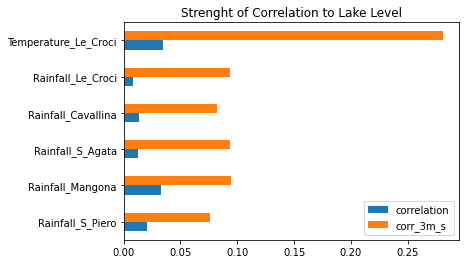

In [41]:
spear_cor = stat_sum_cor.plot(kind = 'barh', title = 'Strenght of Correlation to Lake Level')

# Concerns for sparse matrix

In [42]:
lake_s.describe().round(2)

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00
mean,2.49,3.36,2.72,2.68,3.16,14.57,249.48,2.73
std,6.76,9.02,7.32,7.76,8.14,6.96,2.20,4.02
min,0.00,0.00,0.00,0.00,0.00,-5.35,243.53,0.45
25%,0.00,0.00,0.00,0.00,0.00,9.05,247.84,0.60
50%,0.00,0.00,0.00,0.00,0.00,14.40,250.15,1.50
75%,0.80,1.40,1.20,0.40,1.20,20.20,251.28,3.00
max,80.60,110.00,120.20,113.60,88.40,34.00,252.76,74.65


# Takeaway
based on stats testing and high amounts of zeros in data, 
I intend to comibne Rainfall Mangona, Agata, and Le_Croci

I will drop Rainfall S_Piero and Cavallina

In [43]:
lake_s['avg_rain'] = (lake_s.Rainfall_Mangona + lake_s.Rainfall_S_Agata + lake_s.Rainfall_Le_Croci)/3

In [44]:
cat_col = lake_s.columns

In [45]:
for col in cat_col:
    print(col)
    print(stats.spearmanr(lake_s.Lake_Level, lake_s[col]))

Rainfall_S_Piero
SpearmanrResult(correlation=0.0761859250935103, pvalue=1.2487042427304309e-08)
Rainfall_Mangona
SpearmanrResult(correlation=0.09433303260090985, pvalue=1.7327396071262336e-12)
Rainfall_S_Agata
SpearmanrResult(correlation=0.09335268594893713, pvalue=2.9345710697774053e-12)
Rainfall_Cavallina
SpearmanrResult(correlation=0.08224568590843814, pvalue=7.884566333711997e-10)
Rainfall_Le_Croci
SpearmanrResult(correlation=0.09320484926319125, pvalue=3.1757487164447635e-12)
Temperature_Le_Croci
SpearmanrResult(correlation=-0.2807409125072632, pvalue=2.093661363869769e-101)
Lake_Level
SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)
Flow_Rate
SpearmanrResult(correlation=0.27469487057483755, pvalue=5.370344821584501e-97)
avg_rain
SpearmanrResult(correlation=0.10165730023521762, pvalue=2.8504404739023015e-14)


# Spliting before modeling or learning 

16 years of data

Human split \
9 years to train (55%) \
4 years to validate (25%) \
3 years to test (20%)


In [46]:
lake_s.columns

Index(['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
       'Lake_Level', 'Flow_Rate', 'avg_rain'],
      dtype='object')

In [47]:
lake_s.head()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate,avg_rain
Date,,,,,,,,,
2005-04-01,0.0,0.0,0.0,0.0,0.0,6.20,249.91,0.6,0.0
2005-04-02,0.0,0.0,0.0,0.0,0.0,4.55,250.64,0.6,0.0
2005-04-03,0.0,0.0,0.0,0.0,0.0,-2.00,250.74,0.6,0.0
2005-04-04,0.0,0.0,0.0,0.0,0.0,12.45,252.05,6.5,0.0
2005-04-05,0.0,0.0,0.0,0.0,0.0,20.00,252.04,4.4,0.0


In [48]:
mod_col = lake_s.drop(columns = ['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci'])

In [49]:
mod_col = mod_col.resample('M').mean()

In [50]:
train = mod_col[mod_col.index < '2014-01-01']
validate = mod_col[(mod_col.index >= '2014-01-01') & (mod_col.index < '2018-01-01')]
test = mod_col[mod_col.index >= '2018-01-01']

In [51]:
trainx = train.drop(columns = 'Lake_Level')
trainy = train.Lake_Level

validatex = validate.drop(columns = 'Lake_Level')
validatey = validate.Lake_Level

testx = test.drop(columns = 'Lake_Level')
testy = test.Lake_Level

In [52]:
train.shape, validate.shape, test.shape

((105, 4), (48, 4), (36, 4))

In [53]:
trainx.columns

Index(['Temperature_Le_Croci', 'Flow_Rate', 'avg_rain'], dtype='object')

In [54]:
trainy.head()

Date
2005-04-30    251.533000
2005-05-31    251.502258
2005-06-30    251.375667
2005-07-31    251.024839
2005-08-31    250.239355
Freq: M, Name: Lake_Level, dtype: float64

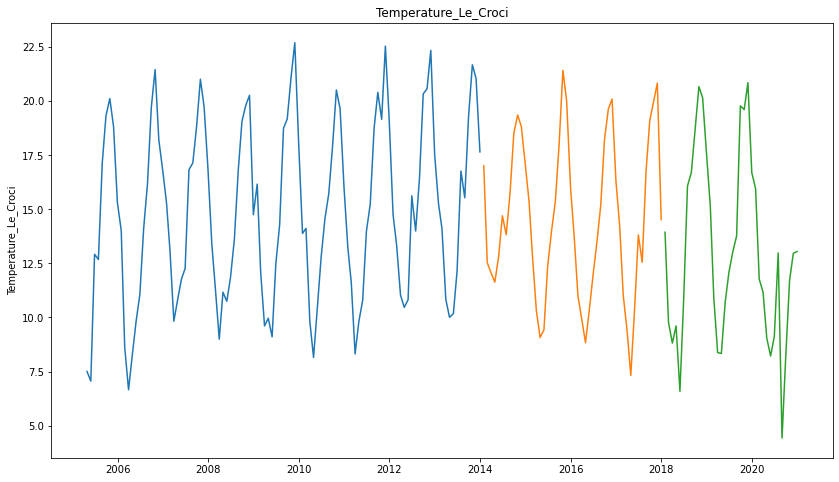

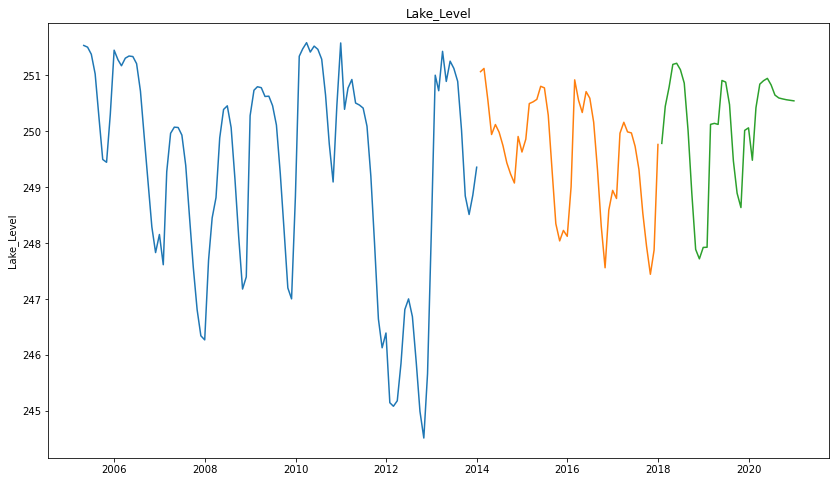

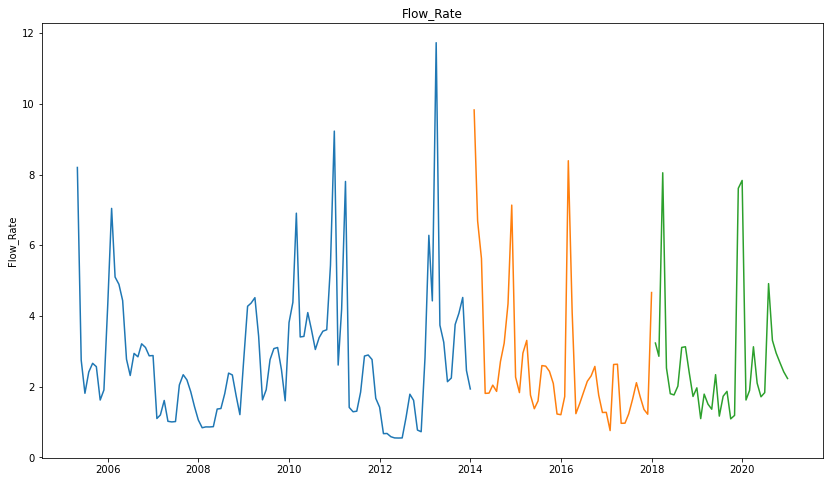

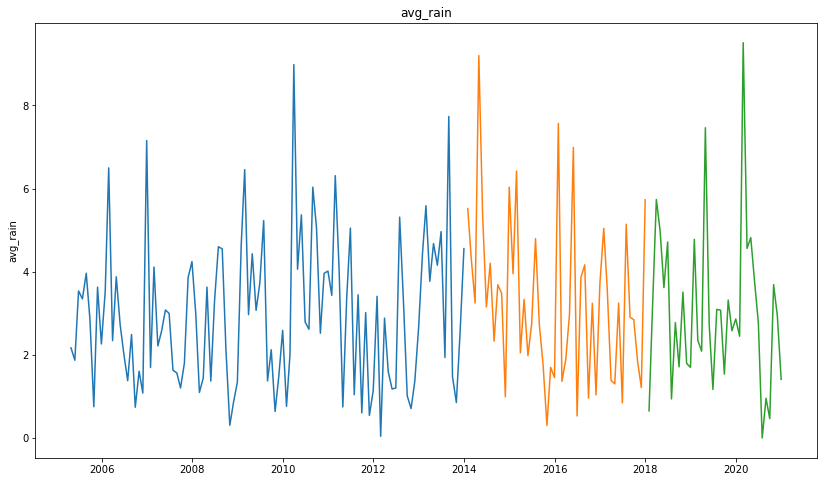

In [55]:
for col in train.columns:
    plt.figure(figsize=(14,8))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()



In [56]:
pd.concat([train.head(1), mod_col.head(1)])

,Temperature_Le_Croci,Lake_Level,Flow_Rate,avg_rain
Date,,,,
2005-04-30,7.503333,251.533,8.2,2.168889
2005-04-30,7.503333,251.533,8.2,2.168889


In [57]:
pd.concat([train.tail(1), validate.head(1)])

,Temperature_Le_Croci,Lake_Level,Flow_Rate,avg_rain
Date,,,,
2013-12-31,17.654839,249.357742,1.932258,4.554839
2014-01-31,17.011290,251.064516,9.827419,5.518280


In [58]:
pd.concat([validate.tail(1), test.head(1)])

,Temperature_Le_Croci,Lake_Level,Flow_Rate,avg_rain
Date,,,,
2017-12-31,14.525806,249.764194,4.660968,5.729032
2018-01-31,13.938710,249.783548,3.231290,0.653763


In [59]:
pd.concat([test.tail(1), mod_col.tail(1)])

,Temperature_Le_Croci,Lake_Level,Flow_Rate,avg_rain
Date,,,,
2020-12-31,13.05,250.543333,2.228333,1.411111
2020-12-31,13.05,250.543333,2.228333,1.411111


# MODELING

The following functions are from modeling lesson with minor modifications to fit this project

In [60]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 4)
    return rmse

In [61]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(rmse)
    plt.show()

In [62]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'rmse'])
eval_df

,model_type,rmse


In [63]:
# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

# Simple Avg

In [64]:
avg_train = trainy.mean()

In [65]:
yhat_df = pd.DataFrame(
    {'Lake_Level': [avg_train]},
    index=validate.index)

yhat_df.head()

,Lake_Level
Date,
2014-01-31,249.312891
2014-02-28,249.312891
2014-03-31,249.312891
2014-04-30,249.312891
2014-05-31,249.312891


1.0234


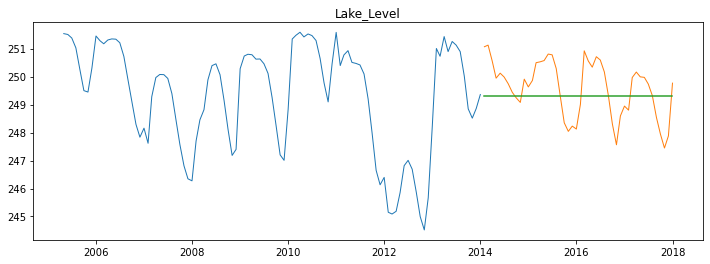

In [66]:
plot_and_eval('Lake_Level')

In [67]:
eval_df = append_eval_df(model_type = 'simple_avg', target_var = 'Lake_Level')

eval_df

,model_type,rmse
0,simple_avg,1.0234


### Holt's Linear Trend


Exponential smoothing applied to both the average and the trend (slope).  

- $\alpha$ / smoothing_level: smoothing parameter for mean. Values closer to 1 will have less of a smoothing effect and will give greater weight to recent values.   
- $\beta$ / smoothing_slope: smoothing parameter for the slope. Values closer to 1 will give greater weight to recent slope/values. 



**Seasonal Decomposition**

#### Basic Holt's Linear Trend

**Make Predictions**

Now, like we would when using sklearn, we will create the Holt object, fit the model, and make predictions. 

Holt: 

- exponential = True/False (exponential vs. linear growth, additive vs. multiplicative)
- damped $\phi$ = True/False: with Holt, forecasts will increase or decrease indefinitely into the future.  To avoid this, use the Damped trend method which has a damping parameter 0< ϕ <1. 


fit: 

- smoothing_level ($\alpha$): value between (0,1)
- smoothing_slope ($\beta$): value between (0,1)
- optimized: use the auto-optimization that allow statsmodels to automatically find an optimized value for us.

# FIT ONLY ON TRAIN

In [68]:
col = 'Lake_Level' 
# create our Holt's Object
model = Holt(train[col], exponential=False, damped=True)

In [69]:
# fit the holt's object
model = model.fit(optimized=True)

In [70]:
yhat = model.predict(start = validate.index[0],
                              end = validate.index[-1])

In [71]:
yhat_df = pd.DataFrame(yhat.round(2), columns = ['Lake_Level'])

yhat_df.head()

,Lake_Level
2014-01-31,249.70
2014-02-28,249.97
2014-03-31,250.19
2014-04-30,250.36
2014-05-31,250.50


1.7568


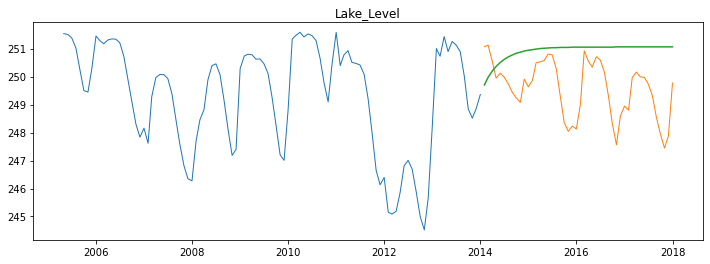

In [72]:
plot_and_eval('Lake_Level')

In [73]:
eval_df = append_eval_df(model_type = "Holt's_Linear", target_var = 'Lake_Level')

eval_df

,model_type,rmse
0,simple_avg,1.0234
1,Holt's_Linear,1.7568


# Prediction Based on Previous cycle

In [74]:
# finding the year-over-year difference for each day from 2013 to 2015
# taking the mean, and then adding that value to the daily 2015 values. 

# find yoy diff. from 2013-2014 and 2014-2015, take the mean, and add to each value in 2015. 
yhat_df = trainy['2013'] + trainy.diff(12).mean()

In [75]:
yhat_df

Date
2013-01-31    250.924014
2013-02-28    250.646687
2013-03-31    251.350143
2013-04-30    250.812735
2013-05-31    251.174660
2013-06-30    251.045735
2013-07-31    250.813047
2013-08-31    249.939498
2013-09-30    248.767068
2013-10-31    248.435950
2013-11-30    248.782401
2013-12-31    249.280143
Freq: M, Name: Lake_Level, dtype: float64

In [76]:
# validate is 4 years

In [77]:
yhat_df = pd.concat([yhat_df,yhat_df], axis = 0)

In [78]:
yhat_df = pd.concat([yhat_df,yhat_df], axis = 0)

In [79]:
yhat_df.shape

(48,)

In [80]:
validate.shape

(48, 4)

In [81]:
yhat_df.index = validate.index

In [82]:
yhat_df = pd.DataFrame(yhat_df.round(4), columns = ['Lake_Level'])

0.8684


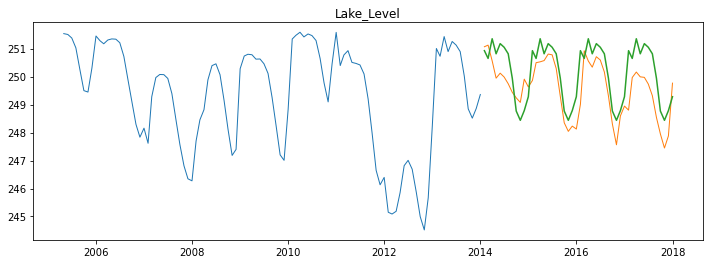

In [83]:
plot_and_eval('Lake_Level')

In [84]:
eval_df = append_eval_df(model_type = "Previous_cycle", target_var = 'Lake_Level')

eval_df

,model_type,rmse
0,simple_avg,1.0234
1,Holt's_Linear,1.7568
2,Previous_cycle,0.8684


# Linear Regression- if you have time

In [85]:
def polynomial_transform(x_tr_data, y_tr_data, x_val_data, y_val_data):
    # make the polynomial features to get a new set of features
    pf = PolynomialFeatures(degree=2)

    # fit and transform X_train_scaled ONLY training gets fit, even for learning transformation!!!
    x_tr_data_deg2 = pf.fit_transform(x_tr_data)

    # transform X_validate_scaled & X_test_scaled
    x_val_data_deg2 = pf.transform(x_val_data)

    # create the model object
    lm2 = LinearRegression(normalize=True)

    # fit the model to our training data
    lm2.fit(x_tr_data_deg2, y_tr_data)

    # predict train
    y_tr_data_deg2 = lm2.predict(x_tr_data_deg2)

    # evaluate: rmse
    rmse_train = mean_squared_error(y_tr_data, y_tr_data_deg2)**(1/2)

    # predict validate
    y_val_data_deg2 = lm2.predict(x_val_data_deg2)

    # evaluate: rmse
    rmse_validate = mean_squared_error(y_val_data, y_val_data_deg2)**(1/2)

    print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train.round(2), 
          "\nValidation/Out-of-Sample: ", rmse_validate.round(2))

    return y_tr_data_deg2, y_val_data_deg2 

In [111]:
polynomial_transform(trainx, trainy, validatex, validatey)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  1.08 
Validation/Out-of-Sample:  0.89


In [88]:
validate_deg2.index = validate.index

In [89]:
validate_deg2.rename(columns={0: "Lake_Level"}, inplace = True)

In [90]:
yhat_df = validate_deg2

yhat_df.head()

,Lake_Level
Date,
2014-01-31,250.225457
2014-02-28,251.902098
2014-03-31,251.950794
2014-04-30,249.622957
2014-05-31,249.792545


0.8881


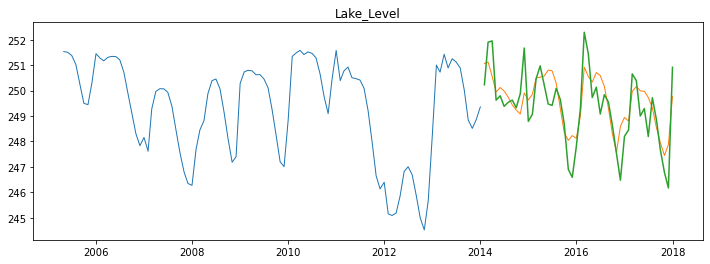

In [91]:
plot_and_eval('Lake_Level')

In [92]:
eval_df = append_eval_df(model_type = "Polynomial_deg2", target_var = 'Lake_Level')

eval_df

,model_type,rmse
0,simple_avg,1.0234
1,Holt's_Linear,1.7568
2,Previous_cycle,0.8684
3,Polynomial_deg2,0.8881


In [93]:
def glm(x_tr_data, y_tr_data, x_val_data, y_val_data):

    # create the model object
    lm = TweedieRegressor(power=1, alpha=0)

    # fit the model ONLY to our training data.  

    lm.fit(x_tr_data, y_tr_data)

    # predict train
    y_tr_predict_glm = lm.predict(x_tr_data)

    # evaluate: rmse
    rmse_train = mean_squared_error(y_tr_data, y_tr_predict_glm)**(1/2)

    # predict validate
    y_val_predict_glm = lm.predict(x_val_data)

    # evaluate: rmse
    rmse_validate = mean_squared_error(y_val_data, y_val_predict_glm)**(1/2)

    print("RMSE for OLS using GLM\nTraining/In-Sample: ", rmse_train.round(2), 
          "\nValidation/Out-of-Sample: ", rmse_validate.round(2))
    return y_tr_predict_glm, y_val_predict_glm

In [94]:
glm(trainx, trainy, validatex, validatey)

RMSE for OLS using GLM
Training/In-Sample:  1.29 
Validation/Out-of-Sample:  0.68


(array([253.00152906, 250.64878363, 249.35869274, 249.63616494,
        248.96667056, 248.314806  , 247.4133143 , 248.25469809,
        249.77019426, 251.42316506, 252.12976477, 251.74543657,
        251.47930285, 250.2551879 , 249.69639242, 249.25824234,
        248.98994385, 248.18312597, 247.93153064, 248.38168319,
        249.6456814 , 248.28317382, 249.15405024, 249.66252536,
        249.27337311, 249.15904758, 249.05190776, 248.38267287,
        248.4358753 , 247.99015463, 247.50835458, 247.91046564,
        248.36856681, 248.74912732, 248.86220328, 249.37467631,
        249.30783897, 249.23853641, 249.33865353, 249.39067642,
        249.01155916, 248.14679894, 247.45088809, 247.22374038,
        249.05679912, 249.97030384, 251.11369176, 251.0978546 ,
        250.79089962, 249.9523152 , 249.5192004 , 249.77629987,
        248.4102686 , 248.46127868, 247.57010047, 247.0196687 ,
        249.06222857, 249.8343011 , 251.09202742, 251.55654751,
        251.08628356, 251.13537552, 250.

In [104]:
yhat_df = [252.37680213, 251.69095833, 251.14224785, 250.53536167,
        249.67335001, 249.04660786, 249.31220796, 248.99239645,
        248.90206919, 249.18238562, 250.09712274, 249.14098452,
        248.95369135, 250.34775886, 250.27945671, 250.0605167 ,
        249.60164595, 249.24321871, 249.69439722, 249.07837107,
        248.34648851, 247.2876683 , 247.41983139, 248.14379873,
        249.83338349, 252.25664607, 250.68229714, 249.82172182,
        250.30070285, 249.06465005, 249.44725043, 249.22705887,
        248.22867958, 247.96927965, 247.31271261, 248.48411337,
        248.89814185, 250.09374495, 250.05878163, 249.72634664,
        249.43327363, 248.49305065, 249.61975013, 248.63035947,
        247.991645  , 247.49903158, 247.1757861 , 250.64147447]

In [106]:
yhat_df = pd.DataFrame(yhat_df, index = validate.index, columns = ['Lake_Level'])

In [108]:
yhat_df.head()

,Lake_Level
Date,
2014-01-31,252.376802
2014-02-28,251.690958
2014-03-31,251.142248
2014-04-30,250.535362
2014-05-31,249.673350


0.6808


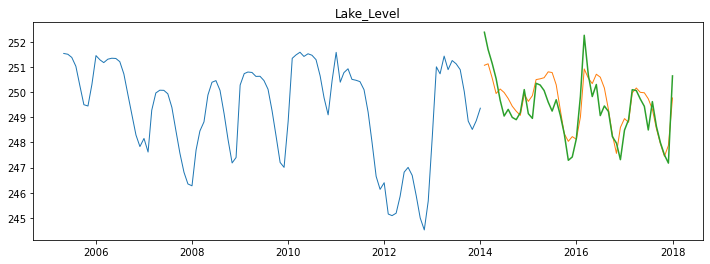

In [109]:
plot_and_eval('Lake_Level')

# Other seasonal Models - if you have time

In [95]:
# facebooks prophet

In [96]:
from sklearn import ensemble

In [97]:
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor()
reg.fit(trainx, trainy)

rmse = round(sqrt(mean_squared_error(validatey, reg.predict(validatex))), 4)
print("The RMSE: {:.4f}".format(rmse))

The RMSE: 0.9739


In [98]:
yhat_df = pd.DataFrame(reg.predict(validatex), columns = ['Lake_Level'])

yhat_df.head()

,Lake_Level
0,250.337904
1,250.941771
2,251.307024
3,250.959623
4,250.723613


In [99]:
yhat_df.index = validate.index

In [100]:
yhat_df = pd.DataFrame(yhat_df.round(4), columns = ['Lake_Level'])

0.9739


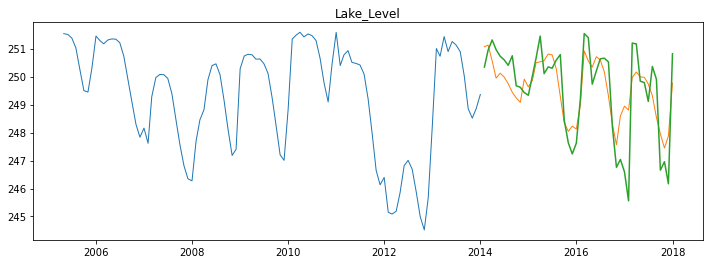

In [101]:
plot_and_eval('Lake_Level')

In [102]:
eval_df = append_eval_df(model_type = "GradientBoostingRegressor", target_var = 'Lake_Level')

eval_df

,model_type,rmse
0,simple_avg,1.0234
1,Holt's_Linear,1.7568
2,Previous_cycle,0.8684
3,Polynomial_deg2,0.8881
4,GradientBoostingRegressor,0.9739
